   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

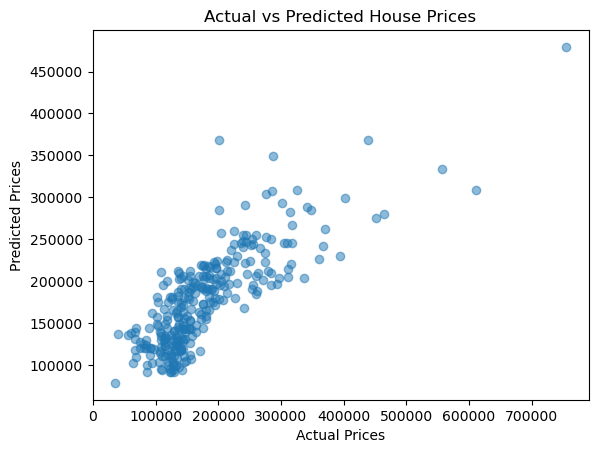

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Define paths for the datasets
train_data_path = 'train.csv'
test_data_path = 'test.csv'
submission_path = 'sample_submission.csv'
description_path = 'data_description.txt'

# Load the dataset
data = pd.read_csv(train_data_path)

# Preview the data
print(data.head())

# Print all column names to verify correct names
print("Columns in the dataset:")
print(data.columns)

# Check if the required columns are in the dataset
required_columns = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']
missing_columns = [col for col in required_columns if col not in data.columns]
if missing_columns:
    raise KeyError(f"The following required columns are missing from the dataset: {missing_columns}")

# Feature selection - using square footage (GrLivArea), number of bedrooms (BedroomAbvGr),
# and number of bathrooms (FullBath + HalfBath)
features = data[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']]

# Add a column to represent total number of bathrooms
data['TotalBath'] = data['FullBath'] + 0.5 * data['HalfBath']

# Update feature set
features = data[['GrLivArea', 'BedroomAbvGr', 'TotalBath']]

# Target variable (house price)
target = data['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plotting predicted vs actual values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()
